# Unidade 1 Trabalho 4 - Estudo de Métricas

## Aluna:  
- Poliana Ellen de Araújo (20240001289)

## Objetivo Geral:  
Este trabalho teve como objetivo é analisar as diferentes métricas estudadas (Cycles, Average Shortest Path Length, Diameter of Network, Shortest Path Length, Connected Components, Giant Connected Components, number connected components, BFS, DFS, SCC, WCC e Clustering Coefficient) aplicando à rede formada pela cidade de Natal/RN utilizando a biblioteca OSMnx, que é utilizada para fazer a análise de redes urbanas.

# Importando bibliotecas

In [7]:
%pip install osmnx      
%pip install networkx   
%matplotlib inline

import osmnx as ox              # Baixar dados de redes viárias
import networkx as nx           # Criação e manipulação de grafos
import matplotlib.pyplot as plt # Criação e manipulação de gráficos
import random                   # Gerar valores aleatórios
import matplotlib.cm as cm      # Mapas de cores contínuos

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


# 0. Rede de Natal/RN

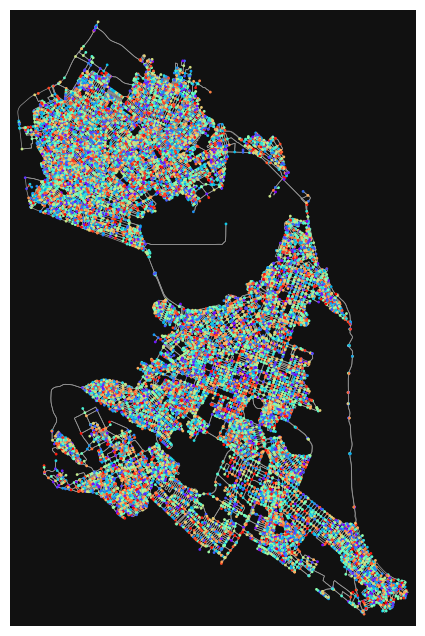

In [ ]:
# Definindo a região de interesse
place_name = "Natal, Rio Grande do Norte, Brazil"

# Gerar grafo, B=baixando dados de OpenStreetMap, selecionando ruas para carros
G = ox.graph_from_place(place_name, network_type='drive')

# Gerar uma lista de cores aleatórias para os nós
node_colors = [cm.rainbow(random.random()) for _ in range(len(G.nodes))]

# Plotar o grafo com cores variadas nos nós
fig, ax = ox.plot_graph(
    G, 
    node_size=4, 
    node_color=node_colors,  # Define a lista de cores
    edge_linewidth=0.5
)
plt.show()


Por padrão, a função graph_from_place da biblioteca OSMnx gera um MultiDiGraph, que é um grafo dirigido que permite múltiplas arestas entre os mesmos nós. Isso ocorre porque, em redes de ruas, é comum encontrar múltiplas arestas entre dois pontos, representando, por exemplo, diferentes faixas, sentidos de direção (ida e volta) ou rotas alternativas entre dois nós.

# 1. Cycles (Ciclos)

- Pergunta: Quantos ciclos independentes existem na rede de Natal?

Identificar a quantidade de ciclos independentes na rede, usamos networkx.cycle_basis para contar os ciclos.

'nx.cycle_basis' não é implementado para grafos do tipo Multigraph, e o OSMnx por padrão cria grafos desse tipo, então primeiramente o grafo foi convertido para um simples:

In [10]:
# Converter o grafo para um grafo simples
G_simple = nx.Graph(G)

# Encontrar ciclos independentes
cycles = nx.cycle_basis(G_simple)
num_cycles = len(cycles)

print("Número de ciclos independentes na rede:", num_cycles)

Número de ciclos independentes na rede: 9414


- Resposta: 9414, um número elevado como esse indica que a rede de ruas tem muitas malhas ou seções fechadas, o que sugere uma boa conectividade e alternativas de rotas.

# 2. Average Shortest Path Length (Comprimento Médio do Caminho Mais Curto)

- Pergunta: Qual é o comprimento médio do caminho mais curto?

Esta métrica reflete a facilidade ou dificuldade de navegação pela cidade, com valores menores indicando uma rede mais conectada e acessível.
O comprimento médio do caminho mais curto indica o quanto as rotas são otimizadas dentro da cidade:

In [ ]:
# Converter o grafo para não direcionado
G_undirected = G.to_undirected()

# Identificar a maior componente conectada
largest_cc = max(nx.connected_components(G_undirected), key=len)

# Subgrafo da maior componente conectada
G_lcc = G_undirected.subgraph(largest_cc).copy()

# Calcular o comprimento médio do caminho mais curto na maior componente conectada
avg_shortest_path_length = nx.average_shortest_path_length(G_lcc)
print("Comprimento médio do caminho mais curto (na maior componente conectada):", avg_shortest_path_length)

Comprimento médio do caminho mais curto (na maior componente conectada): 79.5658127079651


- Resposta: 79,57. Esse número indica que, em média, será preciso percorrer cerca de 79,57 arestas (ou segmentos de ruas) para ir de um nó a outro dentro da maior componente conectada do grafo.

# 3. Diameter of Network (Diâmetro da Rede)

- Pergunta: Qual é o maior caminho dentro da rede?

O diâmetro da rede é a maior distância mínima entre quaisquer dois nós no grafo. O diâmetro mostra a extensão máxima da rede, refletindo o maior percurso possível na cidade sem desconexões.

In [12]:
# Converter o grafo para não direcionado
G_undirected = G.to_undirected()

# Identificar a maior componente conectada
largest_cc = max(nx.connected_components(G_undirected), key=len)
G_lcc = G_undirected.subgraph(largest_cc).copy()  # Subgrafo da maior componente conectada

# Calcular o diâmetro da maior componente conectada
diameter = nx.diameter(G_lcc)
print("Diâmetro da rede (na maior componente conectada):", diameter)

Diâmetro da rede (na maior componente conectada): 209


- Resposta: O valor 209 significa que, na maior componente conectada da rede de ruas, a distância máxima entre dois nós (ou pontos) conectados é de 209 arestas. Para dois nós que estão no caminho mais distante possível dentro dessa componente, seria necessário passar por 209 segmentos de ruas para ir de um ao outro, usando o caminho mais curto disponível.

# 4. Shortest Path Length (Caminho Mais Curto)

P: Qual é o menor caminho entre dois pontos principais?

Escolhemos dois pontos aleatórios para verificar a distância entre eles, e medimos a distância mais curta entre os pontos selecionados, ajudando a entender a conectividade prática.

In [5]:
# Encontrar caminho mais curto entre dois pontos
nodes = list(G.nodes)
shortest_path_length = nx.shortest_path_length(G, source=nodes[0], target=nodes[-1])
print("Comprimento do caminho mais curto entre dois pontos:", shortest_path_length)

Comprimento do caminho mais curto entre dois pontos: 57


- Resposta: O valor 57 significa que, para viajar do nó nodes[0] ao nó nodes[-1] na rede, o caminho mais curto entre esses dois pontos envolve atravessar 57 arestas. Ou seja, existe uma rota mínima entre esses dois nós que passa por 57 segmentos de ruas, que pode ser entendida como a rota mais eficiente em termos de número de segmentos.

# 5. Giant Connected Component (Maior Componente Conectado)

- Pergunta: Qual é o tamanho do maior componente conectado na rede viária, e o que ele indica sobre a conectividade urbana?

É o maior conjunto de nós interligados em uma rede, onde todos os nós têm pelo menos um caminho entre si. Em uma rede de ruas, o GCC representa a área conectada, indicando as partes acessíveis de um ponto a outro na cidade. Componentes conectados menores representam sub-redes isoladas que não fazem parte do GCC, como ruas sem saída ou áreas desconectadas.

In [16]:
# Converter o grafo para não direcionado
G_undirected = G.to_undirected()

# Encontrar o maior componente conectado
giant_cc = max(nx.connected_components(G_undirected), key=len)

# Exibir resultados
print("Número de nós no maior componente conectado:", len(giant_cc))

Número de nós no maior componente conectado: 18668


- Resposta: O valor 18.668 e esse número representa o maior subgrafo da cidade, composto principalmente por ruas interligadas, onde há rotas acessíveis de um ponto a outro. Os nós fora desse maior componente representam pequenas redes isoladas, como ruas privadas.